In [1]:
import numpy as nm  
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns
import numpy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data= pd.read_csv('/content/drive/My Drive/Dataset/diabetes_dataset.csv')
data

,Age,Gender,P0lyuria,P0lydipsia,sudden weight l0ss,weakness,P0lyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Al0pecia,0besity,Result
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [ ]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   P0lyuria            520 non-null    int64
 3   P0lydipsia          520 non-null    int64
 4   sudden weight l0ss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   P0lyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Al0pecia            520 non-null    int64
 15  0besity             520 non-null    int64
 16  Result              520 non-null    int64
dt

Index(['Age', 'Gender', 'P0lyuria', 'P0lydipsia', 'sudden weight l0ss',
       'weakness', 'P0lyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Al0pecia', '0besity', 'Result'],
      dtype='object')

In [ ]:
data.isnull().sum()


Age                   0
Gender                0
P0lyuria              0
P0lydipsia            0
sudden weight l0ss    0
weakness              0
P0lyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Al0pecia              0
0besity               0
Result                0
dtype: int64

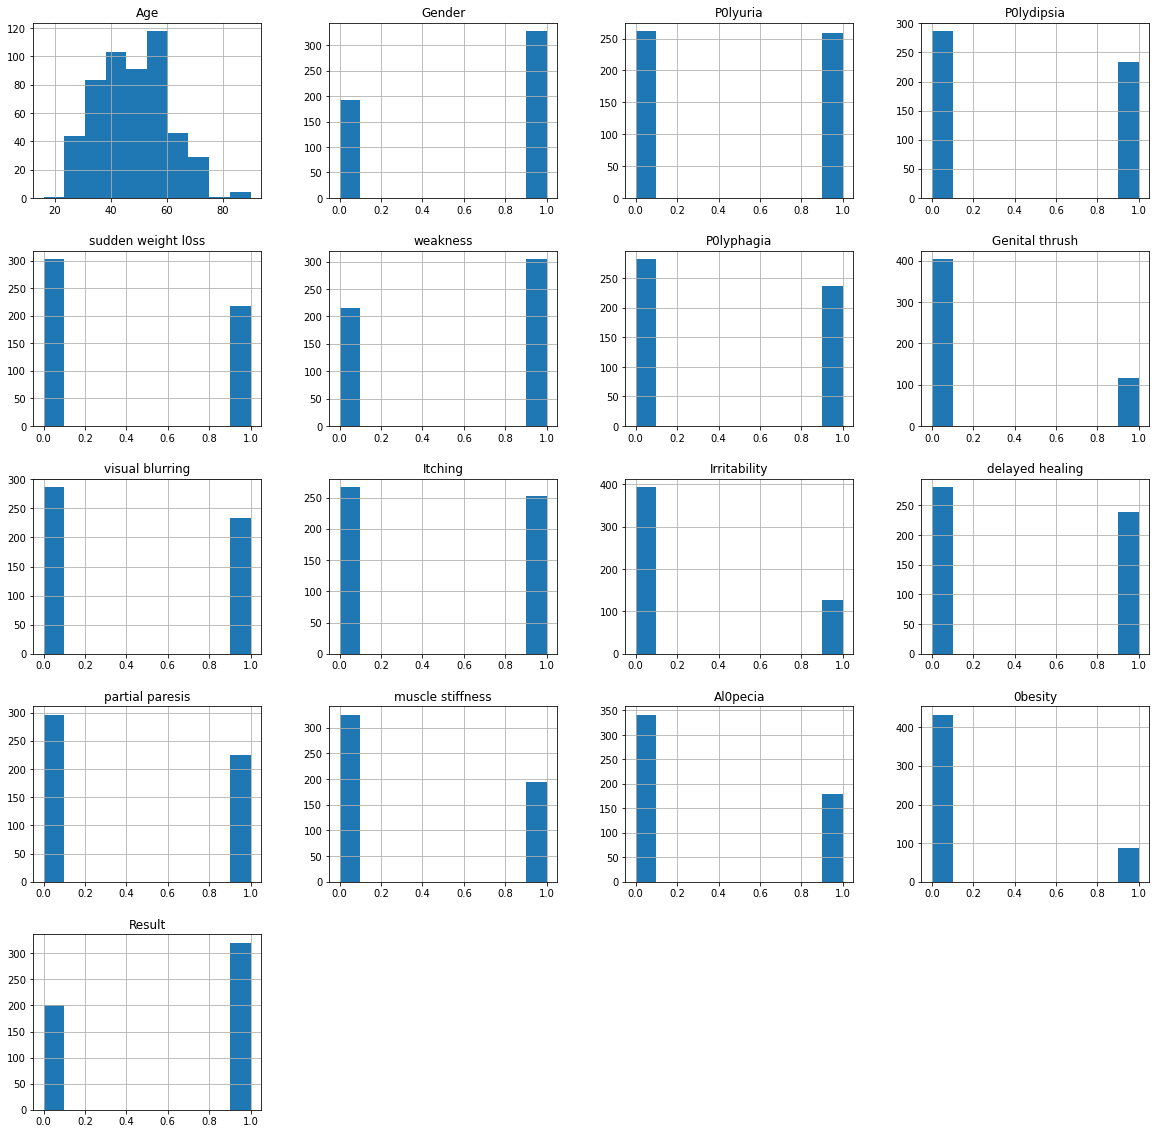

In [ ]:
p = data.hist(figsize = (20,20))

1    320
0    200
Name: Result, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


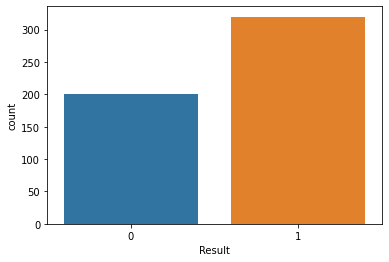

In [ ]:
y=data["Result"]
sns.countplot(y)
target_temp = data.Result.value_counts()
print(target_temp)

<Figure size 864x720 with 0 Axes>

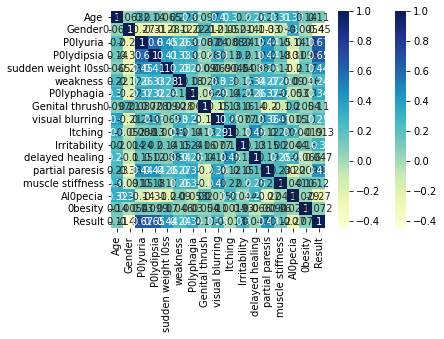

<Figure size 864x720 with 0 Axes>

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.heatmap(data.corr(), cmap="YlGnBu")
plt.figure(figsize=(12,10))

In [ ]:
x = data.iloc[:,0:15].values
y = data.iloc[:,16].values
x=pd.DataFrame(x)
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=0)  

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
#print(dfscores)
#dfcolumns =pd.DataFrame(x.columns.values.tolist())
dfcolumns =pd.DataFrame(data.columns.values.tolist())

#b=data.columns.values.tolist()
#print(b)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score'] #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


              Features       Score
3           P0lydipsia  120.785515
2             P0lyuria  116.184593
4   sudden weight l0ss   57.749309
12     partial paresis   55.314286
1               Gender   38.747637
10        Irritability   35.334127
6           P0lyphagia   33.198418
14            Al0pecia   24.402793
0                  Age   18.845767
8      visual blurring   18.124571


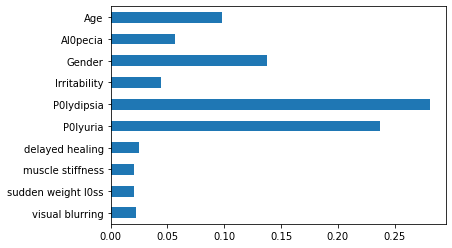

In [ ]:
import pandas as pd
import numpy as np
x = data.iloc[:,0:15]  #independent columns
y = data.iloc[:,16] 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10)
rf.fit(x_train, y_train)
sort = rf.feature_importances_
sort
p= pd.Series(rf.feature_importances_, index=x.columns)
p.nlargest(10).sort_index(ascending=False).plot(kind='barh')

#p.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
data1= pd.read_csv('/content/drive/My Drive/Dataset/diabetes_dataset_2_RF.csv')
data1

,Age,Gender,P0lyuria,P0lydipsia,Genital thrush,visual blurring,Irritability,delayed healing,muscle stiffness,Al0pecia,Result
0,40,1,0,1,0,0,0,1,1,1,1
1,58,1,0,0,0,1,0,0,0,1,1
2,41,1,1,0,0,0,0,1,1,1,1
3,45,1,0,0,1,0,0,1,0,0,1
4,60,1,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,0,0,0,1,0,0,1
516,48,0,1,1,0,0,1,1,0,0,1
517,58,0,1,1,0,1,0,0,1,0,1
518,32,0,0,0,0,1,0,1,0,1,0


<Figure size 864x720 with 0 Axes>

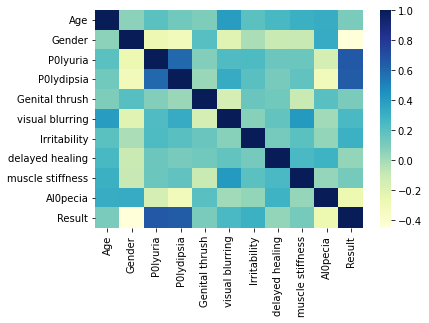

<Figure size 864x720 with 0 Axes>

In [ ]:
import seaborn as sns
sns.heatmap(data1.corr(), cmap="YlGnBu")
plt.figure(figsize=(12,10))

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               520 non-null    int64
 1   Gender            520 non-null    int64
 2   P0lyuria          520 non-null    int64
 3   P0lydipsia        520 non-null    int64
 4   Genital thrush    520 non-null    int64
 5   visual blurring   520 non-null    int64
 6   Irritability      520 non-null    int64
 7   delayed healing   520 non-null    int64
 8   muscle stiffness  520 non-null    int64
 9   Al0pecia          520 non-null    int64
 10  Result            520 non-null    int64
dtypes: int64(11)
memory usage: 44.8 KB


In [ ]:
x1 = data1.iloc[:,0:9].values
y1 = data1.iloc[:,10].values
x1=pd.DataFrame(x1)
from sklearn.model_selection import train_test_split  
x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size= 0.30, random_state=0)  

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x1_train= st_x.fit_transform(x1_train)    
x1_test= st_x.transform(x1_test) 

[[54  8]
 [10 84]]

True Positives(TP) =  54
True Negatives(TN) =  84
False Positives(FP) =  8
False Negatives(FN) =  10


Precision: 0.91304
Recall: 0.89362
F1 Score: 0.90323
Accuracy: 0.885


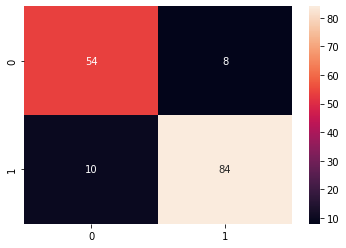

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

classifier= LogisticRegression()
classifier.fit(x1_train, y1_train)  
predictions = classifier.predict(x1_test)

cf_matrix=confusion_matrix(y1_test,predictions)
print(cf_matrix)

print('\nTrue Positives(TP) = ', cf_matrix[0,0])
print('True Negatives(TN) = ', cf_matrix[1,1])
print('False Positives(FP) = ', cf_matrix[0,1])
print('False Negatives(FN) = ', cf_matrix[1,0])
print('\n')
#print(classification_report(y_test,predictions))

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)
    
print('Precision: %.5f' % metrics.precision_score(y1_test, predictions))
print('Recall: %.5f' % metrics.recall_score(y1_test, predictions))
print('F1 Score: %.5f' % metrics.f1_score(y1_test, predictions))
print('Accuracy: %.3f' % metrics.accuracy_score(y1_test, predictions))

[[50 12]
 [10 84]]

True Positives(TP) =  50
True Negatives(TN) =  84
False Positives(FP) =  12
False Negatives(FN) =  10


Precision: 0.87500
Recall: 0.89362
F1 Score: 0.88421
Accuracy: 0.859


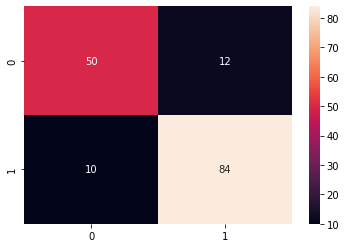

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
svc_model =  SVC(kernel='rbf', random_state=5)
svc_model.fit(x1_train, y1_train)
prediction2 = classifier.predict(x1_test)


cf_matrix=confusion_matrix(y1_test,prediction2)
print(cf_matrix)

print('\nTrue Positives(TP) = ', cf_matrix[0,0])
print('True Negatives(TN) = ', cf_matrix[1,1])
print('False Positives(FP) = ', cf_matrix[0,1])
print('False Negatives(FN) = ', cf_matrix[1,0])
print('\n')
#print(classification_report(y_test,predictions))

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

            
print('Precision: %.5f' % metrics.precision_score(y1_test, prediction2))
print('Recall: %.5f' % metrics.recall_score(y1_test, prediction2))
print('F1 Score: %.5f' % metrics.f1_score(y1_test, prediction2))
print('Accuracy: %.3f' % metrics.accuracy_score(y1_test, prediction2))

[[50 12]
 [10 84]]

True Positives(TP) =  50
False Positives(FP) =  12
False Negatives(FN) =  10
True Negatives(TN) =  84


Precision: 0.87500
Recall: 0.89362
F1 Score: 0.88421
Accuracy: 0.859


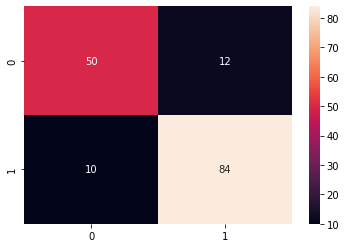

In [ ]:
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import classification_report, confusion_matrix
classifier = GaussianNB()
classifier.fit(x1_train, y1_train)
prediction1 =  classifier.predict(x1_test)

cf_matrix=confusion_matrix(y1_test,prediction1)
print(cf_matrix)

print('\nTrue Positives(TP) = ', cf_matrix[0,0])
print('False Positives(FP) = ', cf_matrix[0,1])
print('False Negatives(FN) = ', cf_matrix[1,0])
print('True Negatives(TN) = ', cf_matrix[1,1])
print('\n')
#print(classification_report(y_test,predictions))

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)
         
print('Precision: %.5f' % metrics.precision_score(y1_test, predictions))
print('Recall: %.5f' % metrics.recall_score(y1_test, predictions))
print('F1 Score: %.5f' % metrics.f1_score(y1_test, predictions))
print('Accuracy: %.3f' % metrics.accuracy_score(y1_test, predictions))